In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
import math

In [2]:
df=pd.read_csv("pluto_25v1.csv")

C:\Users\harsh\AppData\Local\Temp\ipykernel_33696\2472418647.py:1: DtypeWarning: Columns (21,22,24,25,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("pluto_25v1.csv")


In [3]:
df.iloc[1]

borough             BK
block             5852
lot                 13
cd               310.0
bct2020      3003000.0
               ...    
version           25v1
dcpedited          NaN
latitude     40.638575
longitude   -74.030126
notes              NaN
Name: 1, Length: 92, dtype: object

In [4]:
df.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [5]:
vacant_land=df[df['landuse']==11]

In [6]:
vacant_land['geometry']=vacant_land.apply(lambda row: Point(row['longitude'],row['latitude']),axis=1)
gdf_vacant=gpd.GeoDataFrame(vacant_land,geometry='geometry',crs="EPSG:4326")

vacant_land_3857=gdf_vacant.to_crs(epsg=3857)


#Filtering rows in the dataframe that are within the top 10 zipcodes

zip_list=[10456.0,10026.0,10457.0,10452.0,10458.0,10453.0,10468.0,11206.0,11233.0,11212.0,11221.0,10451.0,10025.0,10459.0,10128.0,10027.0]

#Filtering top 10 zipcodes
filtered_df = vacant_land_3857[vacant_land_3857['zipcode'].isin(zip_list)]

#Filtering lots with areas greater than 5642
filtered_df = filtered_df[filtered_df['lotarea']>5642]


C:\Users\harsh\AppData\Local\Temp\ipykernel_33696\467300488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacant_land['geometry']=vacant_land.apply(lambda row: Point(row['longitude'],row['latitude']),axis=1)


In [8]:
filtered_df.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,geometry
35406,MN,1957,25,109.0,1021703.0,1.021703e+10,217.03,1002.0,5.0,9.0,...,NaN,1,NaN,NaN,25v1,t,40.817450,-73.951036,NaN,POINT (-8232191.615 4985452.754)
36241,MN,1957,18,109.0,1021703.0,1.021703e+10,217.03,1002.0,5.0,9.0,...,NaN,1,NaN,NaN,25v1,t,40.815823,-73.951893,NaN,POINT (-8232287.061 4985213.392)
38949,BK,2268,2,301.0,3050700.0,3.050700e+10,507.00,1016.0,14.0,33.0,...,07/14/2017,1,NaN,NaN,25v1,NaN,40.700605,-73.948027,NaN,POINT (-8231856.7 4968280.75)
40934,BX,3231,265,207.0,2025700.0,2.025700e+10,257.00,1005.0,10.0,16.0,...,11/27/2023,1,1.0,1.0,25v1,NaN,40.861002,-73.915206,NaN,POINT (-8228203.083 4991860.985)
41298,BX,2732,81,202.0,2008900.0,2.008900e+10,89.00,2001.0,8.0,17.0,...,NaN,1,NaN,NaN,25v1,t,40.816134,-73.895422,NaN,POINT (-8226000.727 4985259.167)


In [9]:
#Reading the csv data
csv_file = "Final_Fire_Incidence_Data_with_PopDensity.csv"
df = pd.read_csv(csv_file)

this is density (300, 300)


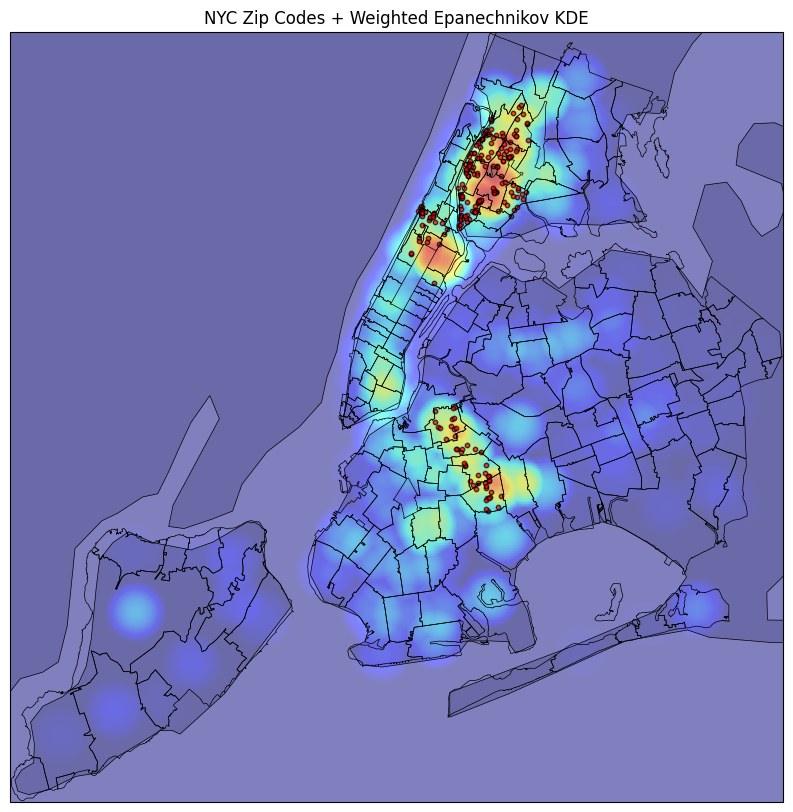

In [25]:


df["geometry"] = df["the_geom"].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")
gdf = gdf.dropna(subset=["geometry"])
gdf = gdf[gdf.geometry.is_valid]

gdf["high_risk_count"] = gdf["high_risk_count"].fillna(0)
gdf["medium_risk_count"] = gdf["medium_risk_count"].fillna(0)
gdf["low_risk_count"] = gdf["low_risk_count"].fillna(0)
gdf["area_mile2"] = gdf["area_mile2"].fillna(0)
gdf["pop_density_per_sqmi"] = gdf["pop_density_per_sqmi"].fillna(0)

gdf["weight"] = ((
    3*gdf["high_risk_count"]
  + 2*gdf["medium_risk_count"]
  + 1*gdf["low_risk_count"])
  *   gdf["area_mile2"]
  *   gdf["pop_density_per_sqmi"]
)

gdf_3857 = gdf.to_crs(epsg=3857)
gdf_3857["centroid"] = gdf_3857.geometry.centroid

cx = gdf_3857["centroid"].x.values
cy = gdf_3857["centroid"].y.values
weights = gdf_3857["weight"].values

buffer_m = 100
xmin, ymin, xmax, ymax = gdf_3857.total_bounds
xmin -= buffer_m
ymin -= buffer_m
xmax += buffer_m
ymax += buffer_m

num_x = 300
num_y = 300
xs = np.linspace(xmin, xmax, num_x)
ys = np.linspace(ymin, ymax, num_y)
X, Y = np.meshgrid(xs, ys)
def epanechnikov_2d(distance, h):
    mask = distance < h
    c = 2.0 / (math.pi * h**2)
    out = np.zeros_like(distance, dtype=float)
    out[mask] = c * (1.0 - (distance[mask]**2 / h**2))
    return out

bandwidth = 2500.0

X3 = X[..., None]
Y3 = Y[..., None]
cx_ = cx[None, :]
cy_ = cy[None, :]

dist = np.sqrt((X3 - cx_)**2 + (Y3 - cy_)**2)
Kvals = epanechnikov_2d(dist, bandwidth)

weighted = Kvals * weights
density = weighted.sum(axis=2)

print("this is density",density.shape)


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.epsg(3857))

ax.add_feature(cfeature.LAND.with_scale("10m"), facecolor="lightgray")
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=0.5)


zip_polygons = ShapelyFeature(
    gdf_3857["geometry"],
    ccrs.epsg(3857),
    edgecolor="black",
    facecolor="none",
    linewidth=0.5
)

ax.add_feature(zip_polygons)

#Identifying locations for potential fire stations
ax.scatter(filtered_df.geometry.x, filtered_df.geometry.y, 
           color='red', s=10, edgecolor='black', alpha=0.7, 
           transform=ccrs.epsg(3857))


im = ax.imshow(
    density,
    origin="lower",
    extent=[xmin, xmax, ymin, ymax],
    alpha=0.5,
    cmap="jet",
    transform=ccrs.epsg(3857)
)

#cbar = plt.colorbar(im, ax=ax, orientation="vertical", shrink=0.7)
#cbar.set_label("Epanechnikov KDE (Weighted)")

ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.epsg(3857))
plt.title("NYC Zip Codes + Weighted Epanechnikov KDE")
plt.show()


In [11]:
gdf.head()

,Unnamed: 0,MODZCTA,label,ZCTA,pop_est,the_geom,centroid,Latitude,Longitude,high_risk_count,medium_risk_count,low_risk_count,Count,area_mile2,geometry,area_sqft,area_sqmiles,pop_density_per_sqmi,weight
0,0,10001,"10001, 10118","10001, 10119, 10199",23072,MULTIPOLYGON (((-73.98774438827894 40.74406551...,POINT (-73.99713787189704 40.75068819675726),-73.997138,40.750688,352,3135,6702,10189,0.623821,"MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ...",1.843664e+07,0.661324,34887.611092,3.052999e+08
1,1,10002,10002,10002,74993,MULTIPOLYGON (((-73.99750380833868 40.71407144...,POINT (-73.98617431136368 40.71578031863019),-73.986174,40.715780,516,7091,9382,16990,0.822293,"MULTIPOLYGON (((-73.9975 40.71407, -73.99709 4...",2.455173e+07,0.880672,85154.261378,1.758386e+09
2,2,10003,10003,10003,54682,MULTIPOLYGON (((-73.98863576728334 40.72293099...,POINT (-73.9891594531684 40.73182645700668),-73.989159,40.731826,341,3215,6653,10210,0.571603,"MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ...",1.612508e+07,0.578408,94538.882897,7.622700e+08
3,3,10004,10004,10004,3028,MULTIPOLYGON (((-74.00826694529984 40.70771979...,POINT (-74.01303190579041 40.70374683920746),-74.013032,40.703747,47,420,952,1419,0.455572,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ...",4.111426e+06,0.147477,20532.000208,1.808092e+07
4,4,10005,10005,"10005, 10271",8831,MULTIPOLYGON (((-74.00782636323468 40.70308666...,POINT (-74.00887017653658 40.706100057005145),-74.008870,40.706100,52,418,963,1434,0.072868,"MULTIPOLYGON (((-74.00783 40.70309, -74.00786 ...",2.080951e+06,0.074644,118308.471601,1.685384e+07


In [12]:
gdf_3857.head()

,Unnamed: 0,MODZCTA,label,ZCTA,pop_est,the_geom,centroid,Latitude,Longitude,high_risk_count,medium_risk_count,low_risk_count,Count,area_mile2,geometry,area_sqft,area_sqmiles,pop_density_per_sqmi,weight
0,0,10001,"10001, 10118","10001, 10119, 10199",23072,MULTIPOLYGON (((-73.98774438827894 40.74406551...,POINT (-8237323.727 4975637.524),-73.997138,40.750688,352,3135,6702,10189,0.623821,"MULTIPOLYGON (((-8236278.03 4974664.364, -8236...",1.843664e+07,0.661324,34887.611092,3.052999e+08
1,1,10002,10002,10002,74993,MULTIPOLYGON (((-73.99750380833868 40.71407144...,POINT (-8236103.249 4970509.323),-73.986174,40.715780,516,7091,9382,16990,0.822293,"MULTIPOLYGON (((-8237364.444 4970258.308, -823...",2.455173e+07,0.880672,85154.261378,1.758386e+09
2,2,10003,10003,10003,54682,MULTIPOLYGON (((-73.98863576728334 40.72293099...,POINT (-8236435.551 4972866.281),-73.989159,40.731826,341,3215,6653,10210,0.571603,"MULTIPOLYGON (((-8236377.258 4971559.548, -823...",1.612508e+07,0.578408,94538.882897,7.622700e+08
3,3,10004,10004,10004,3028,MULTIPOLYGON (((-74.00826694529984 40.70771979...,POINT (-8239093.025 4968742.116),-74.013032,40.703747,47,420,952,1419,0.455572,"MULTIPOLYGON (((-8238562.591 4969325.52, -8238...",4.111426e+06,0.147477,20532.000208,1.808092e+07
4,4,10005,10005,"10005, 10271",8831,MULTIPOLYGON (((-74.00782636323468 40.70308666...,POINT (-8238629.744 4969087.67),-74.008870,40.706100,52,418,963,1434,0.072868,"MULTIPOLYGON (((-8238513.545 4968645.166, -823...",2.080951e+06,0.074644,118308.471601,1.685384e+07
